# PHISHING DATASET

### 1. Cargar datos y chequear integridad

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score,f1_score
from scipy.io import arff
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_validate

In [176]:
#1) Cargar Datos y chequear identidad.

# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets 
  
# metadata 
print(phishing_websites.metadata) 
  
# variable information 
print(phishing_websites.variables) 



{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

In [177]:
X.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [178]:
y.head()

,result
0,-1
1,-1
2,-1
3,-1
4,1


In [179]:
X.isnull().sum()

having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
dtype: int64

In [180]:
y.isnull().sum()

result    0
dtype: int64

### 2. Pensando en un pipeline de Machine Learning, en este paso es necesario preparar los datos. ¿Se debe estandarizar primero y luego separar los datos, o separar los datos primero y luego estandarizar por separado? ¿Por qué?

**Respuesta:**  
Primero, se deben dividir los datos en conjuntos de entrenamiento y prueba. Posteriormente, se deben estandarizar por separado, calculando la media y desviación estándar **solo** en el conjunto de entrenamiento. Luego, se aplican estas mismas medidas al conjunto de prueba. Este orden es fundamental para evitar problemas como el **data leakage** (filtración de datos), que ocurre si estandarizamos los datos antes de separarlos. Esto significaría que el modelo utiliza estadísticas de todo el conjunto de datos, incluidos los de prueba, lo que podría generar un rendimiento engañoso en los datos de prueba y un modelo que no generaliza correctamente en datos nuevos.


### 3. ¿Es recomendable estandarizar los datos en este caso en específico?  explique su respuesta,  y proceda según corresponda.

**Respuesta:**
En este caso, no es necesario estandarizar los datos porque ya se encuentran en un rango acotado (-1, 0, 1), lo que asegura que las características estén en la misma escala. La estandarización es útil cuando las características tienen escalas muy diferentes o valores numéricos grandes, lo que podría afectar el rendimiento de algunos algoritmos de machine learning. Sin embargo, en este caso específico, los datos ya están bien escalados para la aplicación de modelos que se nos pide.

In [181]:
y.mean()

result    0.113885
dtype: float64

In [182]:
y.std()

result    0.993539
dtype: float64

In [183]:
X.mean()

having_ip_address             0.313795
url_length                   -0.633198
shortining_service            0.738761
having_at_symbol              0.700588
double_slash_redirecting      0.741474
prefix_suffix                -0.734962
having_sub_domain             0.063953
sslfinal_state                0.250927
domain_registration_length   -0.336771
favicon                       0.628584
port                          0.728268
https_token                   0.675079
request_url                   0.186793
url_of_anchor                -0.076526
links_in_tags                -0.118137
sfh                          -0.595749
submitting_to_email           0.635640
abnormal_url                  0.705292
redirect                      0.115694
on_mouseover                  0.762099
rightclick                    0.913885
popupwindow                   0.613388
iframe                        0.816915
age_of_domain                 0.061239
dnsrecord                     0.377114
web_traffic              

In [184]:
X.std()

having_ip_address             0.949534
url_length                    0.766095
shortining_service            0.673998
having_at_symbol              0.713598
double_slash_redirecting      0.671011
prefix_suffix                 0.678139
having_sub_domain             0.817518
sslfinal_state                0.911892
domain_registration_length    0.941629
favicon                       0.777777
port                          0.685324
https_token                   0.737779
request_url                   0.982444
url_of_anchor                 0.715138
links_in_tags                 0.763973
sfh                           0.759143
submitting_to_email           0.772021
abnormal_url                  0.708949
redirect                      0.319872
on_mouseover                  0.647490
rightclick                    0.405991
popupwindow                   0.789818
iframe                        0.576784
age_of_domain                 0.998168
dnsrecord                     0.926209
web_traffic              

### 4. Entrenar los modelos NB, QDA, LDA y Logistic Regression utilizando correctamente los conjuntos de entrenamiento, test y validación.


In [185]:
# Dividir en conjunto de entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convertir y en arrays unidimensionales
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

# Entrenar modelos

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Logistic Regression
skf = StratifiedKFold(n_splits=5)
lr = LogisticRegression(max_iter=1000)
cv = cross_validate(lr, X_train, y_train, cv=skf, scoring=['f1', 'precision', 'recall'], return_train_score=True)
print("Metricas cross_validation (F1-score):", cv['test_f1'].mean())
print("Metricas cross_validation (Precision):", cv['test_precision'].mean())
print("Metricas cross_validation (Recall):", cv['test_recall'].mean())
lr.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
y_val_pred_nb = nb.predict(X_val)
y_val_pred_qda = qda.predict(X_val)
y_val_pred_lda = lda.predict(X_val)
y_val_pred_lr = lr.predict(X_val)




c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Metricas cross_validation (F1-score): 0.9365798876370249
Metricas cross_validation (Precision): 0.9264399629871682
Metricas cross_validation (Recall): 0.9469934729193987


### 5. Elija 3 métricas de clasificación que encuentre relevante y explique cuál y por qué encuentra que un modelo es mejor que los demás.

**Respuesta**
- Recall: Esta métrica nos importa en este contexto pues nos va a dar información de todos los sitios web que efectivamente son phishing y cómo se comportó el modelo frente a estos, ademas, un alto recall es crucial para evitar falsos negativos, ya que no identificar un sitio de phishing puede tener consecuencias graves para los usuarios como posibles fraudes.

- F1-score: Esta métrica tiene en cosideración 2 métricas importantes las cuales son Recall y Precisión, por tanto, nos ayudará a mantener un equilibrio entre ambas dependiendo el enfoque que uno quiera adoptar.

- Precisión: En nuestro contexto nos servira para identificar que tan bien reconoce los sitios de phishing correctamente para evitar clasificar incorrectamente un sitio de phishing como uno seguro.

In [186]:
# Calcular las métricas (f1-score, precision, recall)
metrics = {}

metrics['Naive Bayes'] = {
    'precision': precision_score(y_val, y_val_pred_nb),
    'f1-score': f1_score(y_val, y_val_pred_nb),
    'recall': recall_score(y_val, y_val_pred_nb)
}

metrics['QDA'] = {
    'precision': precision_score(y_val, y_val_pred_qda),
    'f1-score': f1_score(y_val, y_val_pred_qda),
    'recall': recall_score(y_val, y_val_pred_qda)
}

metrics['LDA'] = {
    'precision': precision_score(y_val, y_val_pred_lda),
    'f1-score': f1_score(y_val, y_val_pred_lda),
    'recall': recall_score(y_val, y_val_pred_lda)
}

metrics['Logistic Regression'] = {
    'precision': cv['test_precision'].mean(),
    'f1-score': cv['test_f1'].mean(),
    'recall': cv['test_recall'].mean()
}



metrics_df = pd.DataFrame(metrics).T  # Transponer para que los modelos sean las filas

# Mostrar la tabla de métricas
metrics_df

,precision,f1-score,recall
Naive Bayes,0.997015,0.425478,0.270445
QDA,0.941341,0.423101,0.272874
LDA,0.911462,0.922400,0.933603
Logistic Regression,0.926440,0.936580,0.946993


- **NB:** NB muestra una alta precisión, pero, su bajo recall indica que el modelo no está detectando muchos de los sitios de phishing, lo que es crítico en este contexto. Esto lo hace menos confiable a pesar de su precisión.

- **QDA:** Al igual que NB, QDA tiene una alta precisión y bajo recall, por lo que esta fallando en detectar correctamente los sitios de phishing.

- **LDA:** Rendimiento excepcional, F1-score muy alto que indica un buen equilibrio entre precisión y recall. Además, su alto recall significa que está capturando la mayoría de los sitios de phishing, lo cual es esencial para evitar que los usuarios se vean afectados.

- **Logistic Regression:** Tiene el mismo comportamiento que LDA pero con metricas ligeramente superiores todas las categorias.

Por lo tanto, Logistic Regression seria el mejor de los modelos entrenados segun las metricas seleccionadas.


### 6. Realice una matriz de confusión para visualizar cuales fueron los resultados de cada modelo, con el fin de realizar comparaciones. Comente lo que observa.

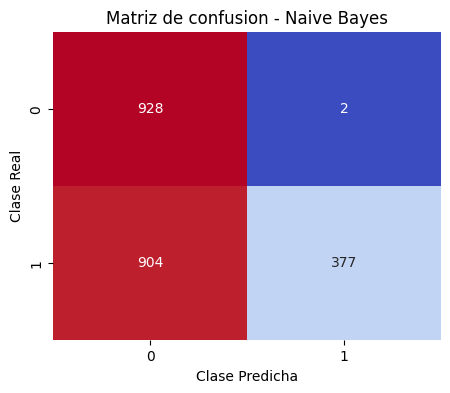

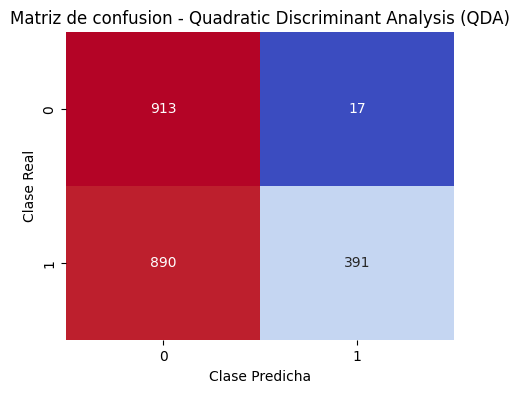

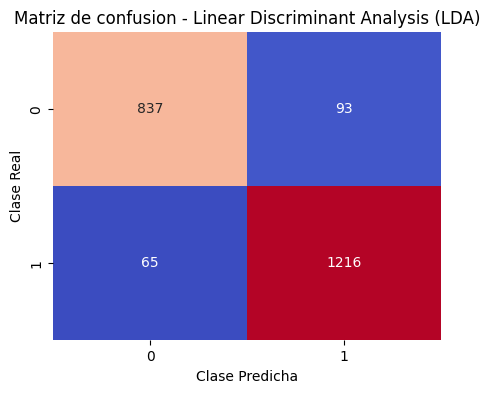

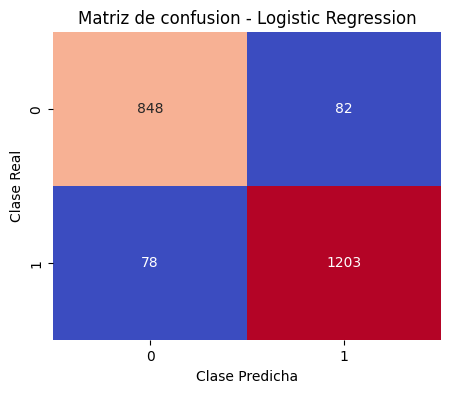

In [187]:
y_test_pred_nb = nb.predict(X_test)
y_test_pred_qda = qda.predict(X_test)
y_test_pred_lda = lda.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

def PlotconfussionMatrix(y_val, y_predict, model):
    matriz = confusion_matrix(y_val, y_predict)
    plt.figure(figsize=(5,4))
    sns.heatmap(matriz, annot=True, fmt="d", cmap="coolwarm", cbar=False)
    plt.title(f'Matriz de confusion - {model}')
    plt.ylabel('Clase Real')
    plt.xlabel('Clase Predicha')
    plt.show()

PlotconfussionMatrix(y_test, y_test_pred_nb, 'Naive Bayes')
PlotconfussionMatrix(y_test, y_test_pred_qda, 'Quadratic Discriminant Analysis (QDA)')
PlotconfussionMatrix(y_test, y_test_pred_lda, 'Linear Discriminant Analysis (LDA)')
PlotconfussionMatrix(y_test, y_test_pred_lr, 'Logistic Regression')


### Análisis Comparativo de Modelos

Como se puede apreciar, **hay una gran diferencia entre algunos modelos**. En la diagonal de las matrices de confusión, se observan los verdaderos positivos y negativos de cada modelo.

- **Naive Bayes** y **QDA** muestran un **rendimiento inferior**, especialmente al clasificar clases negativas. Esto se refleja en la cantidad de falsos negativos que presentan.
  
- Por otro lado, los modelos de **LDA** y **Logistic Regression** presentan un rendimiento notablemente **superior en ambos espectros de clasificación**. Esto se evidencia en una mayor precisión tanto para las clases positivas como negativas.

En conclusión, para este caso específico, podemos afirmar que los modelos de **LDA** y **Logistic Regression** son significativamente mejores en términos de precisión y balance en la clasificación.


### 7. De una pequeña explicación a por qué cree que los dos modelos con peor desempeño tuvieron malos resultados.

Los modelos con peor desempeño, **Naive Bayes** y **QDA**, probablemente tuvieron malos resultados debido a la naturaleza de los datos y las suposiciones que estos modelos hacen sobre ellos:

1. **Naive Bayes**: Este modelo asume que todas las características son independientes entre sí (suposición de independencia condicional), lo que en muchos casos no se cumple en la realidad. Si hay correlaciones significativas entre las características, Naive Bayes tiende a realizar malas predicciones.

2. **Quadratic Discriminant Analysis (QDA)**: QDA supone que las clases siguen una distribución normal y permite que cada clase tenga una matriz de covarianza diferente. Si los datos no se ajustan bien a estas suposiciones o si hay colinealidad (correlación fuerte entre variables), puede afectar su rendimiento. Además, QDA es sensible a los datos ruidosos y a conjuntos de datos pequeños, lo que puede haber influido negativamente en su desempeño en este caso.

En resumen, ambos modelos probablemente fallaron debido a la **falta de ajuste a las suposiciones** que requieren sobre la estructura de los datos.


# Home Equity Line of Credit (HELOC)

In [188]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### 1. Cargar datos y chequear integridad.

In [189]:
df = pd.read_csv('heloc_dataset_v1.csv')

In [190]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [191]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 587


In [192]:
#df = df.drop_duplicates()

df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


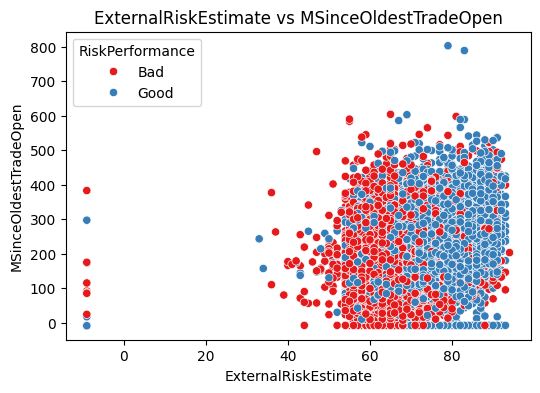

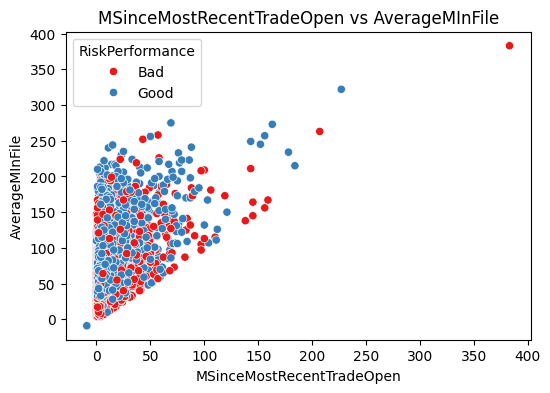

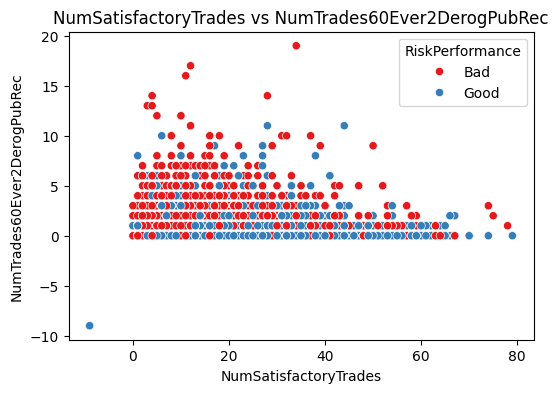

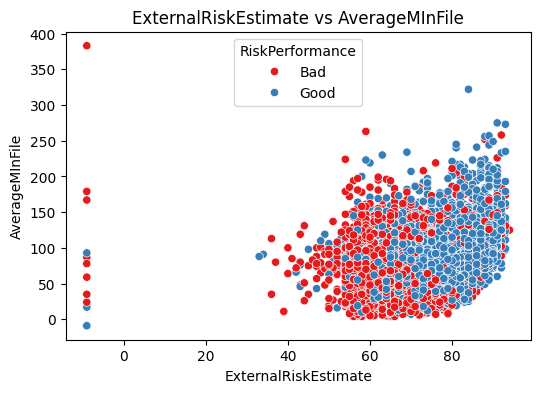

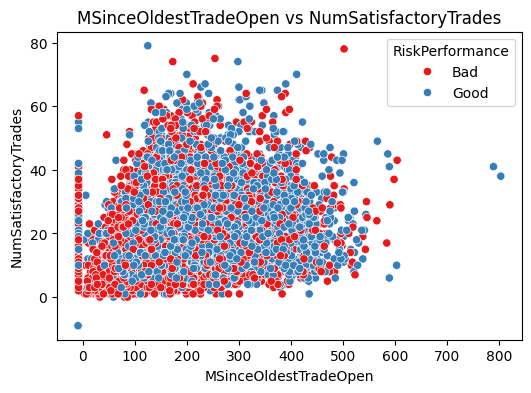

In [193]:
cols = ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec']
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=cols[0], y=cols[1], hue='RiskPerformance', palette='Set1')
plt.title('ExternalRiskEstimate vs MSinceOldestTradeOpen')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=cols[2], y=cols[3], hue='RiskPerformance', palette='Set1')
plt.title('MSinceMostRecentTradeOpen vs AverageMInFile')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=cols[4], y=cols[5], hue='RiskPerformance', palette='Set1')
plt.title('NumSatisfactoryTrades vs NumTrades60Ever2DerogPubRec')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=cols[0], y=cols[3], hue='RiskPerformance', palette='Set1')
plt.title('ExternalRiskEstimate vs AverageMInFile')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=cols[1], y=cols[4], hue='RiskPerformance', palette='Set1')
plt.title('MSinceOldestTradeOpen vs NumSatisfactoryTrades')
plt.show()

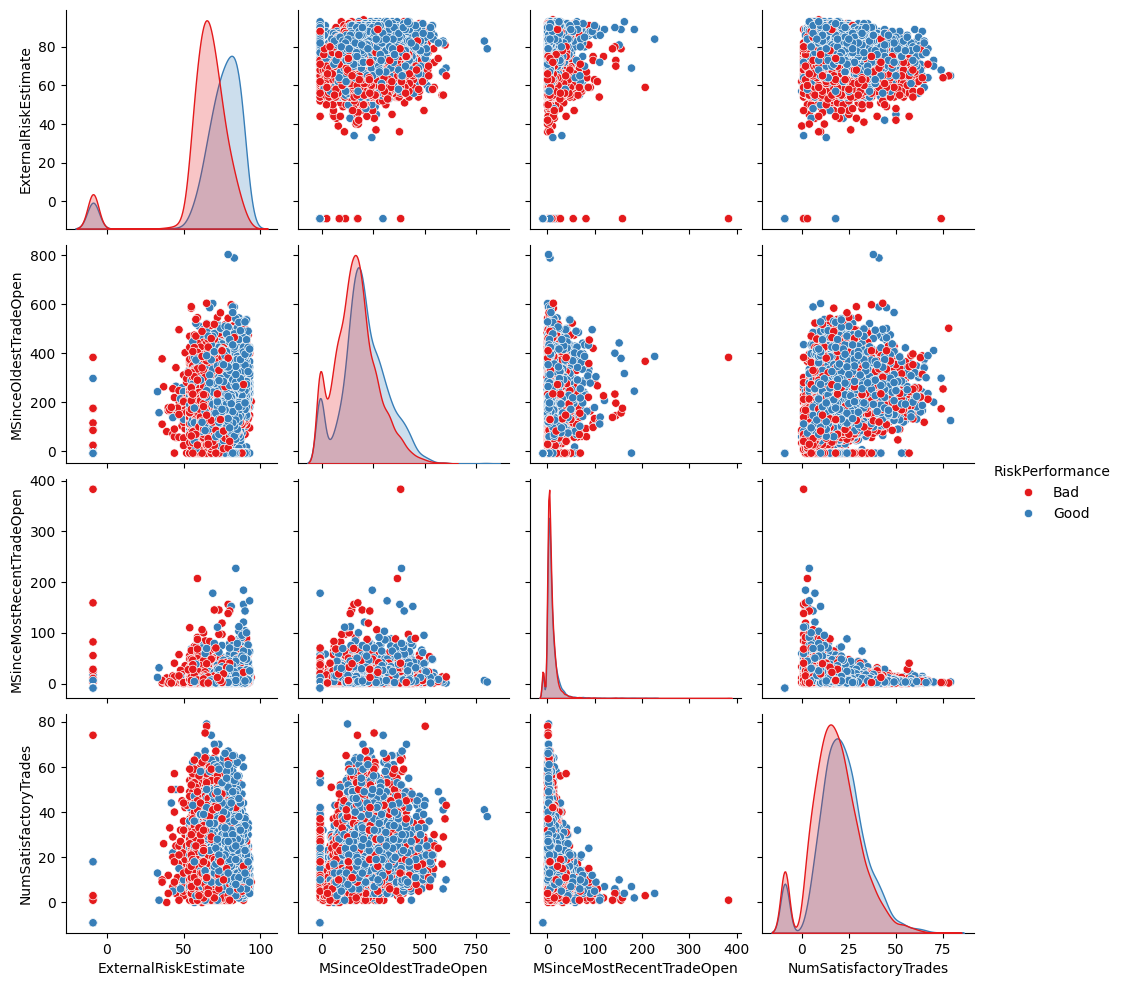

In [194]:
cols = ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'RiskPerformance', 'NumSatisfactoryTrades']

sns.pairplot(df[cols], hue='RiskPerformance', palette='Set1', diag_kind='kde')

plt.show()

Estimo que los modelos obtendran malos resultados por que las clases estan demasiado acopladas respecto a 'RiskPerformance' en todas las dimensiones investigadas a priori. La superposicion de las clases presentadas en 'PairPlot' indica que al modelo le costara identificar las clases y/o discernir entre clases.

### 4. ¿Es recomendable estandarizar los datos en este caso en específico? explique su respuesta, y proceda según corresponda.

**Respuesta:**
Sí, es recomendable estandarizar los datos cuando estás utilizando modelos como Logistic Regression, QDA, LDA, y Naive Bayes. Estos modelos tienden a ser sensibles a la escala de las características, y estandarizar hace que todas las variables tengan una media de 0 y una desviación estándar de 1, lo que es importante si las variables tienen rangos muy diferentes.

En particular, los modelos como LDA y Logistic Regression usan cálculos basados en distancias o varianza, por lo que escalar las características ayuda a que el modelo aprenda mejor y más rápido.

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convertir la columna objetivo a valores binarios
df['RiskPerformance'] = df['RiskPerformance'].map({'Good': 1, 'Bad': 0})

# Separar las características (X) y la variable objetivo (y)
X = df.drop('RiskPerformance', axis=1)  # Features
y = df['RiskPerformance']  # Target

# Dividir los datos: primero en entrenamiento (60%) y temporal (40% para prueba + validación)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)

# Dividir el temporal en prueba (25%) y validación (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.375, random_state=42)  # 0.375 * 0.40 = 15%

# Estandarizar las características (excepto la columna objetivo)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Imprimir las formas de los conjuntos de datos
print(f"Train set: {X_train_scaled.shape}, {y_train.shape}")
print(f"Validation set: {X_val_scaled.shape}, {y_val.shape}")
print(f"Test set: {X_test_scaled.shape}, {y_test.shape}")

Train set: (6275, 23), (6275,)
Validation set: (2615, 23), (2615,)
Test set: (1569, 23), (1569,)


### 5. Entrenar los modelos NB, QDA, LDA y  Logistic Regression utilizando correctamente los conjuntos de entrenamiento, test y validación.

El entrenamiento se realiza de la siguiente manera:

para QDA, LDA y Naive vayes se usa 60% entrenamiento y 40% test

Para logistic regressión se usa 60% entrenamiento, 15% validación y 25% testeo, en donde el conjunto de validación (15%) ajusta los hiperparámetros con cross validation

In [196]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#::::::::::::::::::::::::::::::::::::::::::::::::::::: QDA, LDA, Naive Bayes ::::::::::::::::::::::::::::::::::::::::::::

# Entrenamiento de modelos generativos
nb_model = GaussianNB()
qda_model = QDA()
lda_model = LDA()

# Entrenamiento con conjunto de entrenamiento
nb_model.fit(X_train_scaled, y_train)
qda_model.fit(X_train_scaled, y_train)
lda_model.fit(X_train_scaled, y_train)


# Evaluación en el conjunto combinado (se usara en la siguiente pregunta)
nb_combined_pred = nb_model.predict(X_val_scaled)
qda_combined_pred = qda_model.predict(X_val_scaled)
lda_combined_pred = lda_model.predict(X_val_scaled)

#::::::::::::::::::::::::::::::::::::::::::::::::::::: LOGISTIC REGRESSION ::::::::::::::::::::::::::::::::::::::::::::

# Definir los espacios de búsqueda de hiperparámetros para Logistic Regression
param_grid_logreg = {
    'max_iter': [100, 200, 500, 1000],
    'C': [0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs']
}

# Crear el modelo de Logistic Regression
logreg_model = LogisticRegression()

# Ajuste de hiperparámetros usando GridSearchCV
logreg_grid = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy')

# Ajustar el modelo
logreg_grid.fit(X_train_scaled, y_train)  # Ajuste de hiperparámetros para Logistic Regression

# Selección del mejor modelo de Logistic Regression
best_logreg_model = logreg_grid.best_estimator_

# Evaluación en el conjunto de validación (se usara en la siguiente pregunta)
logreg_val_pred = best_logreg_model.predict(X_val_scaled)

2615
1569


### 6. Realice una matriz de confusión para visualizar cuales fueron los resultados de cada modelo, con el fin de realizar comparaciones. Comente lo que observa.

Realización de matriz de confusión utilizando micro averge (1 sola matriz que agrupe los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos)

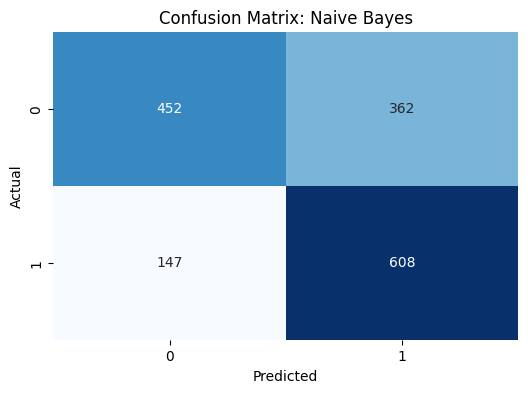

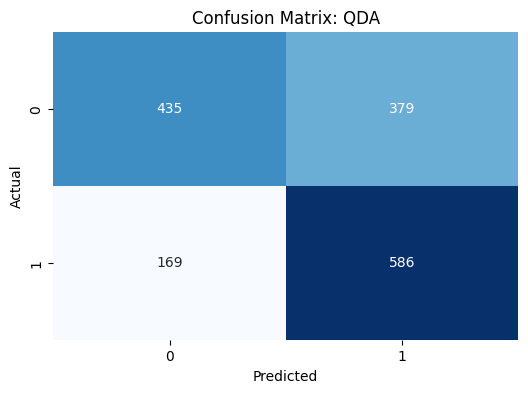

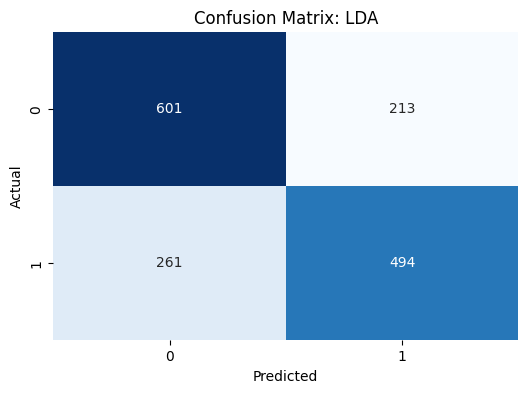

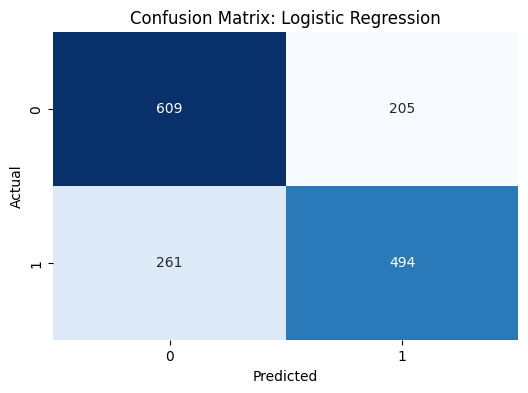

In [197]:
from sklearn.metrics import confusion_matrix

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Función para calcular y visualizar la matriz de confusión."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#Predicciones del conjunto de test
nb_test_pred = nb_model.predict(X_test_scaled)
qda_test_pred = qda_model.predict(X_test_scaled)
lda_test_pred = lda_model.predict(X_test_scaled)
logreg_test_pred = best_logreg_model.predict(X_test_scaled)


# Visualizar las matrices de confusión para los modelos generativos
plot_confusion_matrix(y_test, nb_test_pred, "Naive Bayes")
plot_confusion_matrix(y_test, qda_test_pred, "QDA")
plot_confusion_matrix(y_test, lda_test_pred , "LDA")
plot_confusion_matrix(y_test, logreg_test_pred, "Logistic Regression")

Se puede observar que los modelos como primera impresión tienen resultados decentes, pero no perfectos. En la diagonal de la matriz de confusión se acumula la cantidad de verdaderos positivos y verdaderos negativos, si la diagonal en proporción a las esquinas es mucho mayor, da indicios de un buen modelo.

A primeras impresiones, LDA como modelo generativo tiene mejores resultados que QDA y Naive Vayes.

Por otro lado el modelo discriminativo Logisitc Regression también parece tener buenos resultados, sin embargo hay que tener en cuenta que para este caso se achico el conjunto de pruebas para agregar una fase de validación

### 7. Elija 3 métricas de clasificación que encuentre relevante y explique cuál y por qué encuentra que un modelo es mejor que los demás.

Las métricas seleccionadas son:

F-Score: ya que dentro de si contiene información tanto de la presición y recall, lo que la hace una métrica bastante completa.

presición: ya que en el contexto de entrega de crédito será una métrica de "asegurarse de que los buenos pagadores sean realmente buenos pagadores"

recall: ya que en el contexto de entrega de crédito será una métrica de "potenciales clientes alcanzados"

-una alta presición y un bajo recall significaría que quizas no se tengan tantos ingresos sin embargo son ingresos asegurados, puesto que se trata con clientes que si son buenos pagadores realmente.

-un alto recall y una baja presición significaría que se alcanzarán muchos potenciales clientes, a costa de tener también varios malos pagadores.

In [198]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from prettytable import PrettyTable

# Función para imprimir las métricas de cada modelo de forma tabular
def print_metrics_table(y_true, y_pred, model_name, table):
    precision = precision_score(y_true, y_pred)  # Precisión
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1-Score

    # Agregar las métricas a la tabla
    table.add_row([model_name, precision, recall, f1])

# Crear la tabla
metrics_table = PrettyTable()
metrics_table.field_names = ["Modelo", "Precisión", "Recall", "F1-Score"]

# Métricas para el conjunto combinado
print_metrics_table(y_test, nb_test_pred, "Naive Bayes", metrics_table)
print_metrics_table(y_test, qda_test_pred, "QDA", metrics_table)
print_metrics_table(y_test, lda_test_pred, "LDA", metrics_table)
print_metrics_table(y_test, logreg_test_pred, "Logistic Regression", metrics_table)

# Imprimir la tabla
print(metrics_table)


+---------------------+--------------------+--------------------+--------------------+
|        Modelo       |     Precisión      |       Recall       |      F1-Score      |
+---------------------+--------------------+--------------------+--------------------+
|     Naive Bayes     | 0.6268041237113402 | 0.8052980132450331 | 0.7049275362318841 |
|         QDA         | 0.6072538860103627 | 0.776158940397351  | 0.6813953488372093 |
|         LDA         | 0.6987270155586988 | 0.6543046357615894 | 0.6757865937072504 |
| Logistic Regression | 0.7067238912732475 | 0.6543046357615894 | 0.6795048143053645 |
+---------------------+--------------------+--------------------+--------------------+


Todos los modelos tienen resultados similares, sin embargo Naive Bayes destaca por su "equilibrio" (mejor F1-score) y un alto recall. Lo que se traduce en alcazar mayor potenciales clientes y obtener mayores ingresos a costa de tener algunos malos clientes.

por lo tanto se recomienda Naive Bayes.

LDA y Logistic Regressión tiene un bajo recall lo que se transformaria en perder potenciales buenos clientes, lo que se traduce en bajos ingresos, por lo que en este contexto no se recomendaría. y si bien Logistic regresión tiene una muy buena presición, **no es adecuado cuando los verdaderos positivos son tan valiosos**

Logistic Regression se recomendaría en un contexto en donde tener "clientes malos" es extremadamente peligroso.

QDA tiene un rendimiento similar a Naive Bayes, pero las métricas otorgan un mejor resultado para Naive Bayes, por lo tanto este útlimo es el que se recomienda

### 8. ¿Los resultados obtenidos, coinciden con la suposición realizada en el punto 2.2?, Tanto en caso positivo como negativo, explique su respuesta en base los datos y el funcionamiento de cada modelo.

El modelo hizo una clasificación mejor a la esperada, y si bien las clases en los gráficos parecian muy acopladas y se suponía no podrían clasificarse bien, el modelo logro valores aceptables de presición y recall cercanas a 0.7. Por lo tanto las suposiciones previamente realizadas subestimaron la capacidad de los modelos generativos y discriminativos para reconocer patrones y generalizar.

Cada modelo entrenado logra resultados para distintas situaciones:

**Naive Bayes**
Naive Bayes sobresale por su capacidad para identificar verdaderos positivos, lo que significa una mayor captura de clientes potenciales. En el contexto de la entrega de créditos, es más valioso conseguir un cliente potencial (verdadero positivo) que simplemente evitar a los malos pagadores (como se menciona en el punto anterior).

**Logistic Regression**
Se recomienda utilizar la regresión logística en contextos donde la identificación de "clientes malos" sea extremadamente crítica, ya que este modelo muestra una alta precisión. Esto es especialmente importante en situaciones donde los errores pueden resultar en pérdidas significativas.

**LDA**
La LDA se sugiere en escenarios donde tanto la precisión como el recall son igualmente importantes. Este enfoque permite un balance entre la identificación correcta de los clientes potenciales y la minimización de los falsos negativos, haciendo que ambos aspectos sean prioritarios en la toma de decisiones (Este modelo posee alta presición , recall  y F1-Score)

**QDA**
En este caso, el uso de QDA no se recomienda, ya que Naive Bayes lo supera en las métricas analizadas. Esto sugiere que, para este conjunto de datos, Naive Bayes es una opción más efectiva, aún asi los resultados están muy cercanos a los obtenidos por Naive Bayes, lo que podría significar que con otro set de training podrían obtenerse mejores resultados.

Por lo tanto si bien un análisis previo supuso no obtener buenos resultados, en realidad si se obtuvieron modelos de utilidad con resultados más que aceptable.